# Measure Worksheet

## 1. Setup
This section load python objects and variables please check the ```cam``` variable

### 1.1 Load python objects
Loads ```scope``` and ```lamp``` python objects for reading sekonic and communication with the lamp

In [4]:
cam = "http://192.168.2.224/video_feed"
whiteTreshold = 150

%run calibration_setup.ipynb

### 1.2 Connect to lamp
Lamp needs to be closed before it can be opened again.
If you dont know the serial port where the lamp is connected use the Find COM port section
1st You need to setup sekonic and feedback camera (the areas where the data will be read, 1st -green value is set up so it would be possibel to get dUV - sign location), then close the lamp and start again with the scope objects

In [14]:
lamp1.close()

In [16]:
lamp1 = apollo_device(ComPort='COM6')
lamp1.getId()
lamp1.macId = lamp1.macId.replace(":","")
lamp1.macId

'782184456C74'

In [17]:
lamp1.color = [200,50,50,500,0]
lamp1.update()

#### [Optional] Find COM port

In [9]:
# Get COM port list
import serial.tools.list_ports

com_ports = list(serial.tools.list_ports.comports())

for port, desc, hwid in com_ports:
    print(str(port)+" "+str(desc))

COM5 USB Serial Port (COM5)
COM6 USB Serial Port (COM6)


### 1.3 Set Sekonic camera areas
Set the area where to "read" the Tcp, dUV and lux variables
Once the object is initalized tune the paramters and test by ```update()```
To save the paramteres use the Setup below to generate the ```saved_string``` and copy and paste it into funtion paramter and save the workbook

In [29]:
Brightness = scope(saved_string="self.slider_h.value = (229, 388)\nself.slider_v.value = (390, 448)\nself.minus_comp.value = False\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.')]) \n")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Label(value='Out:')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x87\x00\x00\x002\x08\x02\x00\x00\x00\xf9\x82_\x9…

Output()

In [19]:
Brightness.update()

4150

In [30]:
dUV = scope(saved_string="self.slider_h.value = (250, 443)\nself.slider_v.value = (304, 368)\nself.minus_comp.value = True\nself.offset_x.value = -80\nself.offset_y.value = 2\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('20.0', '0,0'), ('0.6', '0.0'), ('0.8', '0.0')]) \n")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Label(value='Out:')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x87\x00\x00\x002\x08\x02\x00\x00\x00\xf9\x82_\x9…

Output()

In [23]:
dUV.update()

-0.029

In [31]:
Kelvin = scope(saved_string="self.slider_h.value = (254, 412)\nself.slider_v.value = (228, 286)\nself.minus_comp.value = False\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('G', '6')]) \n")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Label(value='Out:')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x87\x00\x00\x002\x08\x02\x00\x00\x00\xf9\x82_\x9…

Output()

In [25]:
Kelvin.update()

5129

#### Setup

In [26]:
Brightness.save_string()

"self.slider_h.value = (229, 388)\nself.slider_v.value = (390, 448)\nself.minus_comp.value = False\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.')]) \n"

In [27]:
dUV.save_string()

"self.slider_h.value = (250, 443)\nself.slider_v.value = (304, 368)\nself.minus_comp.value = True\nself.offset_x.value = -80\nself.offset_y.value = 2\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('20.0', '0,0'), ('0.6', '0.0'), ('0.8', '0.0')]) \n"

In [28]:
Kelvin.save_string()

"self.slider_h.value = (254, 412)\nself.slider_v.value = (228, 286)\nself.minus_comp.value = False\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('G', '6')]) \n"

# Measure

In [56]:
lamp1.close()

In [ ]:
lamp1 = apollo_device(ComPort='COM6',SekBrightnes=Brightness, SekDuv=dUV, SekKelvin=Kelvin)
lamp1.getId()
lamp1.macId = lamp1.macId.replace(":","")
lamp1.macId

'782184456C74'

In [ ]:
%%time
wbIndex = 1 # 0-5
wbRanges = [0,14,71,100,178,255]
tempIndex = wbRanges[wbIndex]

import pandas as pd

data = {'sampleNr': [], 'Brightness': [], 'Kelvin': [], 'dUV': [], 'mixedR': [], 'mixedG': [], 'mixedB': [], 'mixedW': [], 'redActual': [], 'lampTemp': [], 'lampTempTarget': [], 'fanSpeed': []}
df = pd.DataFrame(data)

lamp1.color = [1,1,1,tempIndex,0]
lamp1.update(rgbtMode=True)
time.sleep(10)

for i in range(1,255):
    lamp1.color = [i,i,i,tempIndex,0]
    lamp1.update(rgbtMode=True)
    time.sleep(0.3)
    lamp1.read()
    
    timeout = 2
    if i<50:
        timeout = 7
    if i<100:
        timeout = 3
        
    time.sleep(timeout)
    readBrightness = Brightness.update()
    readKelvin = Kelvin.update()
    readDuv = dUV.update()
    
    jsonString = "{"+lamp1.lastValAsJsonString[1:-1]+"}"
    jsonObject = eval(jsonString)
    
    new_line = pd.DataFrame([{
        'sampleNr':i,
        'Kelvin':readKelvin,
        'Brightness':readBrightness,
        'dUV':readDuv,
        'mixedR': jsonObject['mixed_red'],
        'mixedG': jsonObject['mixed_green'],
        'mixedB': jsonObject['mixed_blue'],
        'mixedW': jsonObject['mixed_white'],
        'redActual': jsonObject['red_actual'],
        'lampTemp': jsonObject['lamp_temp'],
        'lampTempTarget': jsonObject['lamp_target'],
        'fanSpeed': jsonObject['fan_speed']}])
    
    df = pd.concat([df, new_line],ignore_index=True)
    
    print('i:'+str(i)+", dUV:"+str(readDuv)+" Kelvin:"+str(readKelvin)+"K Brightness:"+str(readBrightness)+"lx")
    

file_path = "Apollo"+str(lamp1.macId)+"_"+str(wbIndex)+"_"+datetime.datetime.now().strftime("%d%m%Y_%H%M%S")+".py"
df.to_csv(file_path, index=False)
print("Saved to: "+file_path)

In [36]:
df.head(10)

,sampleNr,Brightness,Kelvin,dUV
0,1.0,62.7,3185.0,0.0044
1,2.0,62.5,3175.0,0.0046
2,3.0,62.9,3191.0,0.0044
3,4.0,62.3,3170.0,0.0044
4,5.0,62.6,3182.0,0.0047
5,6.0,66.4,2752.0,-0.0015
6,7.0,69.0,2891.0,0.0018
7,8.0,72.9,3081.0,0.0060
8,9.0,73.3,3091.0,0.0056
9,10.0,77.0,2710.0,0.0007


In [52]:
%%time
for wbIndex in range(6):
    wbRanges = [0,14,71,100,178,255]
    tempIndex = wbRanges[wbIndex]

    import pandas as pd

    data = {'sampleNr': [], 'Brightness': [], 'Kelvin': [], 'dUV': [], 'mixedR': [], 'mixedG': [], 'mixedB': [], 'mixedW': [], 'redActual': [], 'lampTemp': [], 'lampTempTarget': [], 'fanSpeed': []}
    df = pd.DataFrame(data)

    lamp1.color = [1,1,1,tempIndex,0]
    lamp1.update(rgbtMode=True)
    time.sleep(10)

    for i in range(1,255):
        lamp1.color = [i,i,i,tempIndex,0]
        lamp1.update(rgbtMode=True)
        time.sleep(0.3)
        lamp1.read()

        timeout = 2
        if i<50:
            timeout = 7
        if i<100:
            timeout = 3

        time.sleep(timeout)
        readBrightness = Brightness.update()
        readKelvin = Kelvin.update()
        readDuv = dUV.update()

        jsonString = "{"+lamp1.lastValAsJsonString[1:-1]+"}"
        jsonObject = eval(jsonString)

        new_line = pd.DataFrame([{
            'sampleNr':i,
            'Kelvin':readKelvin,
            'Brightness':readBrightness,
            'dUV':readDuv,
            'mixedR': jsonObject['mixed_red'],
            'mixedG': jsonObject['mixed_green'],
            'mixedB': jsonObject['mixed_blue'],
            'mixedW': jsonObject['mixed_white'],
            'redActual': jsonObject['red_actual'],
            'lampTemp': jsonObject['lamp_temp'],
            'lampTempTarget': jsonObject['lamp_target'],
            'fanSpeed': jsonObject['fan_speed']}])

        df = pd.concat([df, new_line],ignore_index=True)

        print('i:'+str(i)+", dUV:"+str(readDuv)+" Kelvin:"+str(readKelvin)+"K Brightness:"+str(readBrightness)+"lx")


    file_path = "Apollo"+str(lamp1.macId)+"_"+str(wbIndex)+"_"+datetime.datetime.now().strftime("%d%m%Y_%H%M%S")+".py"
    df.to_csv(file_path, index=False)
    print("Saved to: "+file_path)
    
lamp1.color = [0,50,0,100,0]
lamp1.update(rgbtMode=True)

i:1, dUV:-0.0015 Kelvin:2794K Brightness:64.6lx
i:2, dUV:-0.0016 Kelvin:2796K Brightness:64.8lx
i:3, dUV:-0.0013 Kelvin:2796K Brightness:64.9lx
i:4, dUV:-0.0015 Kelvin:2797K Brightness:65.0lx
i:5, dUV:-0.0056 Kelvin:2462K Brightness:69.0lx
i:6, dUV:-0.0058 Kelvin:2462K Brightness:69.2lx
i:7, dUV:0.0007 Kelvin:2762K Brightness:75.2lx
i:8, dUV:0.0005 Kelvin:2767K Brightness:75.3lx
i:9, dUV:0.0007 Kelvin:2762K Brightness:75.8lx
i:10, dUV:0.001 Kelvin:2763K Brightness:75.8lx
i:11, dUV:0.0007 Kelvin:2754K Brightness:76.0lx
i:12, dUV:0.0004 Kelvin:2760K Brightness:75.8lx
i:13, dUV:0.0007 Kelvin:2875K Brightness:93.6lx
i:14, dUV:0.001 Kelvin:2865K Brightness:93lx
i:15, dUV:0.001 Kelvin:2856K Brightness:93.2lx
i:16, dUV:0.0008 Kelvin:2858K Brightness:93lx
i:17, dUV:-0.0029 Kelvin:2605K Brightness:97.8lx
i:18, dUV:-0.0026 Kelvin:2601K Brightness:97.8lx
i:19, dUV:0.0024 Kelvin:2836K Brightness:105lx
i:20, dUV:0.0025 Kelvin:2824K Brightness:104lx
i:21, dUV:0.0024 Kelvin:2825K Brightness:104lx
i:2

Write the last dataframe into file

In [40]:
import datetime

wbIndex = 0 # 0-5
wbRanges = [0,14,71,100,178,255]
tempIndex = wbRanges[wbIndex]

file_path = "Apollo"+str(lamp1.macId)+"_"+str(wbIndex)+"_"+datetime.datetime.now().strftime("%d%m%Y_%H%M%S")+".py"
df.to_csv(file_path, index=False)

Draw a graph

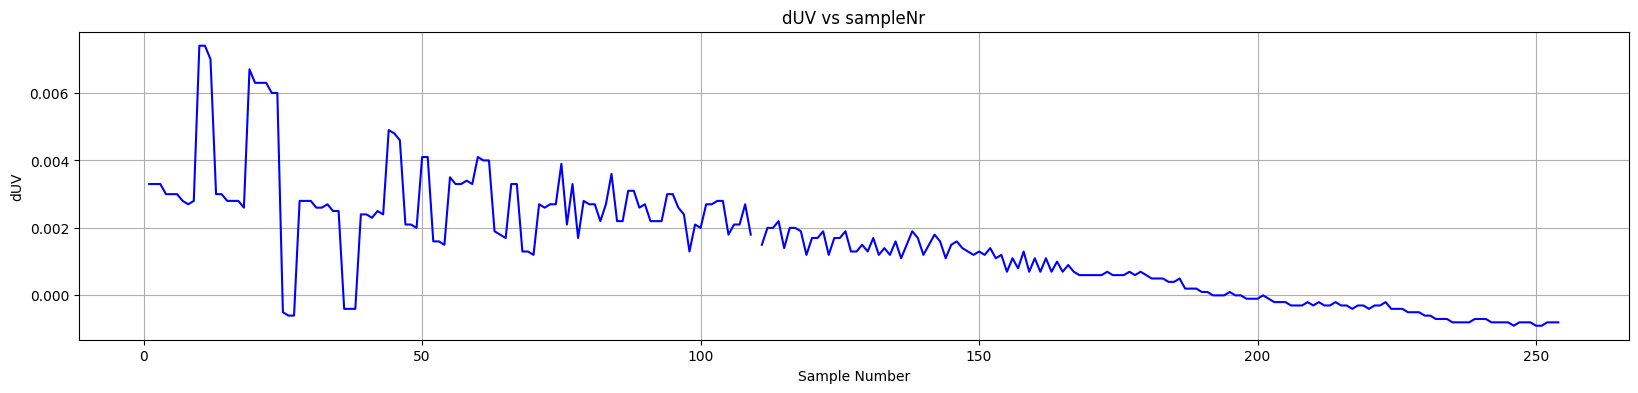

In [55]:
import matplotlib.pyplot as plt

data = df

# Create a plot for dUV against sampleNr
plt.figure(figsize=(20, 4))
plt.plot(data['sampleNr'], data['dUV'], color='b')
plt.title('dUV vs sampleNr')
plt.xlabel('Sample Number')
plt.ylabel('dUV')
plt.grid(True)

# Show the graph
plt.show()

In [54]:
lamp1.color = [10,50,10,100,0]
lamp1.update(rgbtMode=True)